# Data Loading

In [45]:
import numpy as np
import matplotlib.pyplot as plt

init_angle = 79.495 * np.pi / 180
u_init_angle = 0.047 * np.pi / 180

# data.txt contains the following columns:
# voltage, current, current uncertainty, angle, empty, empty, area, area_min, area_max
data = np.loadtxt('data.txt', skiprows=1)

voltage = data[:, 0]
current = data[:, 1]
current_uncertainty = data[:, 2]
angle = data[:, 3]
area = data[:, 4]
area_min = data[:, 5]
area_max = data[:, 6]

# import package that computes uncertainties using partial derivatives
import uncertainties as unc
import uncertainties.umath as umath
from uncertainties import unumpy as unp

# voltages are certain has 0 uncertainty
voltage = unp.uarray(voltage, 0)

# currents are uncertain
current = unp.uarray(current, current_uncertainty)

# angle convert to radians
angle = angle * np.pi / 180
# angles use init_angle as reference, and use u_init_angle as uncertainty
angle = unp.uarray(angle, u_init_angle)
# init angle is uncertain
init_angle = unc.ufloat(init_angle, u_init_angle)
# subtract angle from init_angle
angle = init_angle - angle

# compute n = sqrt((2/sqrt(3) * sin(angle) + 0.5)**2 + 3/4)
# only size-1 arrays can be converted to Python scalars
n = unp.sqrt((2/3**0.5 * unp.sin(angle) + 0.5)**2 + 3/4)
A = unc.ufloat(13900, 100)
B = unc.ufloat(1.689, 0.001)
wavelength = unp.sqrt(A / (n - B))
print("wavelength:")
print(wavelength)

T0 = unc.ufloat(293, 0.1)
R0 = unc.ufloat(1.1, 0.1)
alpha0 = unc.ufloat(4.5e-3, 0.1e-3)

T = T0 + ((voltage/current)/R0 - 1) / alpha0

print("T:")
print(T)

# compute area
area = unp.uarray(area, (area_max - area_min) / 2)


wavelength:
[1081.3685284742476+/-54.01691864123996
 1118.516620375935+/-59.79165284232323
 1123.4386998961759+/-60.58639405706209
 1047.759525914988+/-49.12450954806588
 1039.8426049028408+/-48.016867920788805
 1020.8313274368509+/-45.42548860886676
 1002.8479937296955+/-43.06190317150466
 985.8036176513303+/-40.899026320310696
 957.2442484788653+/-37.44001668529413
 954.2234156792169+/-37.08603744407175
 942.4357682806761+/-35.726206546632646
 931.0884757824336+/-34.449122429678496
 914.8256392781796+/-32.672703466812685]
T:
[2260.698666885659+/-270.6389350615974
 2360.6793120118055+/-314.1324343234279
 2470.0675879939536+/-319.1894918682255
 2578.9292701279155+/-288.8261689294302
 2660.7803677803677+/-292.8687711029068
 2756.11788643077+/-332.9292645853006
 2849.0516758945046+/-338.654690016249
 2918.8069415964146+/-341.0206044110907
 3058.137511902761+/-323.99530871563434
 3072.826234371689+/-349.8140364034946
 3162.9237270665844+/-390.1578251682468
 3264.108758130389+/-365.7948949

# Calculate Fit

In [38]:
def compute_line_fit_m_um_b_ub(xs, ys, xerror, yerror):
    """

    :param xs:
    :param ys:
    :param xerror:
    :param yerror:
    :return: (slope, uncertainty in slope, intercept, uncertainty in intercept)
    """
    N = len(xs)
    b = (np.sum(xs**2) * np.sum(ys) - np.sum(xs) * np.sum(xs * ys)) / (N * np.sum(xs**2) - np.sum(xs)**2)
    m = (N * np.sum(xs * ys) - np.sum(xs) * np.sum(ys)) / (N * np.sum(xs**2) - np.sum(xs)**2)
    delta = np.sum(1/(yerror**2)) * np.sum(xs**2 / yerror**2) - (np.sum(xs / yerror**2))**2
    db = np.sqrt(1 / delta * np.sum(xs**2 / yerror**2))
    dm = np.sqrt(1 / delta * np.sum(1 / yerror**2))
    return m, dm, b, db

def chi_squared(xs, ys, m, b, yerror):
    chi_sq = sum((ys - m * xs - b) ** 2 / yerror ** 2)
    return chi_sq

# PLOT

[2260.698666885659+/-270.6389350615974
 2360.6793120118055+/-314.1324343234279
 2470.0675879939536+/-319.1894918682255
 2578.9292701279155+/-288.8261689294302
 2660.7803677803677+/-292.8687711029068
 2756.11788643077+/-332.9292645853006
 2849.0516758945046+/-338.654690016249
 2918.8069415964146+/-341.0206044110907
 3058.137511902761+/-323.99530871563434
 3072.826234371689+/-349.8140364034946
 3162.9237270665844+/-390.1578251682468
 3264.108758130389+/-365.79489498341775
 3318.690993536653+/-340.9428120358787]
[1081.3685284742476+/-54.01691864123996
 1118.516620375935+/-59.79165284232323
 1123.4386998961759+/-60.58639405706209
 1047.759525914988+/-49.12450954806588
 1039.8426049028408+/-48.016867920788805
 1020.8313274368509+/-45.42548860886676
 1002.8479937296955+/-43.06190317150466
 985.8036176513303+/-40.899026320310696
 957.2442484788653+/-37.44001668529413
 954.2234156792169+/-37.08603744407175
 942.4357682806761+/-35.726206546632646
 931.0884757824336+/-34.449122429678496
 914.825

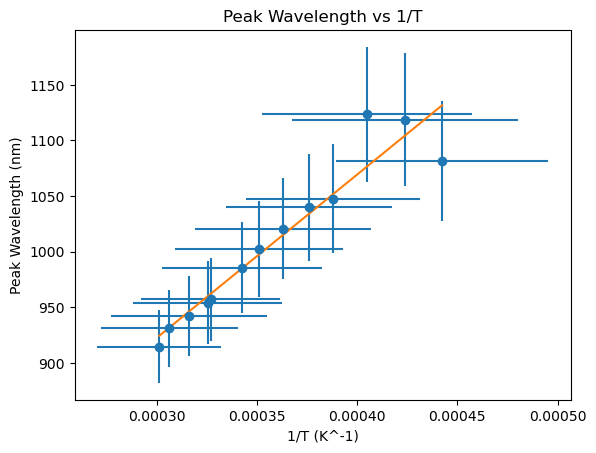

m, dm, b, db
1467573.3493096926 295001.84665881895 482.37915114696693 102.04438636278132
^ that was value in nm
0.00014675733493096926 2.9500184665881896e-05 4.823791511469669e-08 1.0204438636278132e-08
0.002298 is the expected value for m


In [50]:
# Plot peak wavelength vs 1/T
# plot a line of best fit
# plot error bars
T_value = np.array([t.n for t in T])
T_u = np.array([t.s for t in T])
T_inv = 1/T
T_inv_value = np.array([t.n for t in T_inv])
T_inv_u = np.array([t.s for t in T_inv])
wavelength_n = np.array([w.n for w in wavelength])
wavelength_u = np.array([w.s for w in wavelength])
print(T)
print(wavelength)

plt.errorbar(T_inv_value, wavelength_n, xerr=T_inv_u, yerr=wavelength_u, fmt='o')
m, dm, b, db = compute_line_fit_m_um_b_ub(T_inv_value, wavelength_n, T_inv_u, wavelength_u)
x = np.linspace(min(T_inv_value), max(T_inv_value), 1000)
y = m * x + b
plt.plot(x, y, label='y = {:.3f}x + {:.3f}'.format(m, b))
plt.xlabel('1/T (K^-1)')
plt.ylabel('Peak Wavelength (nm)')
plt.title('Peak Wavelength vs 1/T')
plt.show()
print("m, dm, b, db")
print(m, dm, b, db)
print("^ that was value in nm")
print(m/10e9, dm/10e9, b/10e9, db/10e9)
print(2.298e-3, "is the expected value for m")


[0.851901532920805+/-0.005695149524337687
 1.023816900811163+/-0.010956246856814417
 1.1911003081032612+/-0.09239675448992613
 1.3691227696115633+/-0.00932119331620841
 1.6643994705080747+/-0.009957406530998577
 1.775731708150858+/-0.008882904853842747
 1.9374890768612605+/-0.011827755607739193
 2.0806408222553183+/-0.011417548941270478
 2.1945989110672843+/-0.008561338621273595
 2.2635947533027605+/-0.009045915820994817
 2.367707818451038+/-0.00956159994003506
 2.4038863811240447+/-0.07052168333920707
 2.5632864371140522+/-0.006930746471059603]
[7.723429189130646+/-0.1197147320100073
 7.766704700673298+/-0.1330686606711183
 7.812000792807953+/-0.12922297892563045
 7.855129580196197+/-0.11199460655045587
 7.886374730096789+/-0.11006875075044954
 7.921578405685645+/-0.1207964529472471
 7.954741472590522+/-0.11886575904591937
 7.978930230125041+/-0.11683561511080026
 8.025561353399093+/-0.10594530411225549
 8.030353014606447+/-0.11384113832750527
 8.059252108903797+/-0.12335353579015769


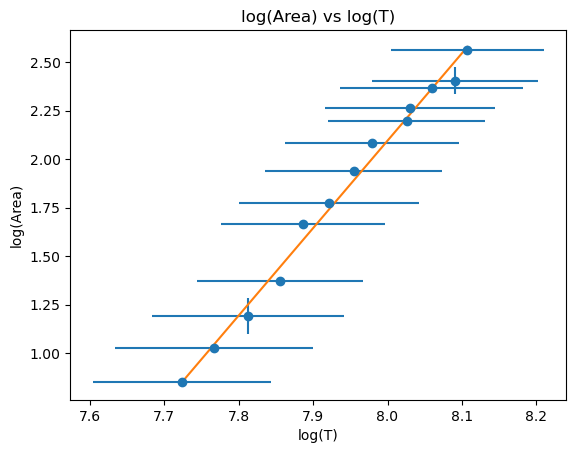

m, dm, b, db
4.504208700902453 0.01913547900730733 -33.93858976949142 0.15164498417210642


In [51]:
# log log plot of area vs temperature
# plot a line of best fit
# plot error bars
log_area = unp.log(area)
log_area_value = np.array([a.n for a in log_area])
log_area_u = np.array([a.s for a in log_area])
log_T = unp.log(T)
log_T_value = np.array([t.n for t in log_T])
log_T_u = np.array([t.s for t in log_T])
print(log_area)
print(log_T)
# plot log(area) vs log(T)
plt.errorbar(log_T_value, log_area_value, xerr=T_u/T_value, yerr=log_area_u, fmt='o')
m, dm, b, db = compute_line_fit_m_um_b_ub(log_T_value, log_area_value, log_T_u, log_area_u)
x = np.linspace(min(log_T_value), max(log_T_value), 1000)
y = m * x + b
plt.plot(x, y, label='y = {:.3f}x + {:.3f}'.format(m, b))
plt.xlabel('log(T)')
plt.ylabel('log(Area)')
plt.title('log(Area) vs log(T)')
plt.show()
print("m, dm, b, db")
print(m, dm, b, db)



# Plot Curves


[1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504362527329328+/-0.0002162429319518116
 1.8504362527329328+/-0.0002162429319518116
 1.850403183

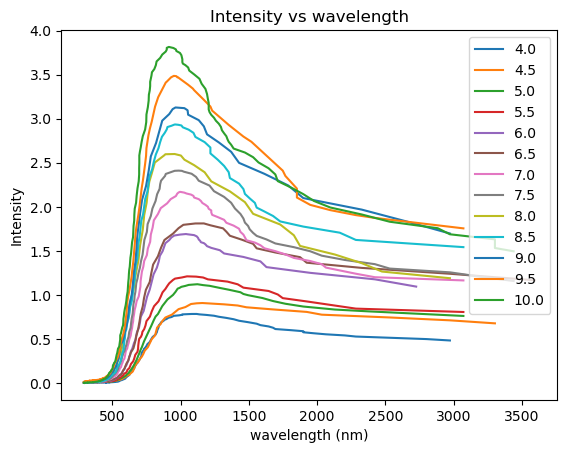

In [83]:
# load data from angle_data folder
# each file name is value.txt, where value is 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0
# contains angle, intensity

# load data from angle_data folder
for name in np.arange(4.0, 10.5, 0.5):
    data = np.loadtxt('angle_data/{}.txt'.format(name), skiprows=2)
    angle = data[:, 0]
    
    intensity = data[:, 1]
    intensity = intensity - intensity.min()
    angle = angle * np.pi / 180
    angle = unp.uarray(angle, u_init_angle)
    angle = init_angle - angle
    n = unp.sqrt((2/3**0.5 * unp.sin(angle) + 0.5)**2 + 3/4)
    # filter all n <= 1.69
    intensity = intensity[n > 1.69]
    n = n[n > 1.69]
    print(n)
    A = unc.ufloat(13900, 100)
    B = unc.ufloat(1.689, 0.001)
    wavelength = unp.sqrt(A / (n - B))
    wavelength = unp.nominal_values(wavelength)
    # label each plot with the value 
    plt.plot(wavelength, intensity, label='{}'.format(name))
    # plt.xlim(0.9, 1.1)

plt.xlabel('wavelength (nm)')
plt.ylabel('Intensity')
plt.title('Intensity vs wavelength')
plt.legend()
plt.show()
